## 1. Import packages and define data directory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb

In [2]:
data_dir = "../input/" # Uncomment this line if you work on local computer
# data_dir = '/kaggle/input/eee-datathon-challenge-2020/' # Comment this line if you work on local computer

## 2. Import Train dataset

In [3]:
diamonds = pd.read_csv(data_dir+"train.csv",index_col = False)
# diamonds = pd.read_csv("train.csv",index_col = False)
diamonds.head() # display the data on the top of the table

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,27454,1.70,Very Good,E,VS2,58.6,60.0,18107,7.91,7.82,4.61
1,38353,0.47,Very Good,F,SI1,61.1,61.0,1021,4.97,5.01,3.05
2,2675,0.70,Good,D,VS1,57.8,60.0,3239,5.85,5.87,3.39
3,15280,1.50,Premium,I,SI2,62.9,57.0,6132,7.28,7.26,4.57
4,49324,0.51,Ideal,F,VVS2,62.2,56.0,2093,5.08,5.12,3.17


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Price is int64, best if all numeric attributes have the same datatype, especially as float64
diamonds["price"] = diamonds["price"].astype(float)

# Preview dataset again
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,27454,1.70,Very Good,E,VS2,58.6,60.0,18107.0,7.91,7.82,4.61
1,38353,0.47,Very Good,F,SI1,61.1,61.0,1021.0,4.97,5.01,3.05
2,2675,0.70,Good,D,VS1,57.8,60.0,3239.0,5.85,5.87,3.39
3,15280,1.50,Premium,I,SI2,62.9,57.0,6132.0,7.28,7.26,4.57
4,49324,0.51,Ideal,F,VVS2,62.2,56.0,2093.0,5.08,5.12,3.17


## 3. Data Visualization

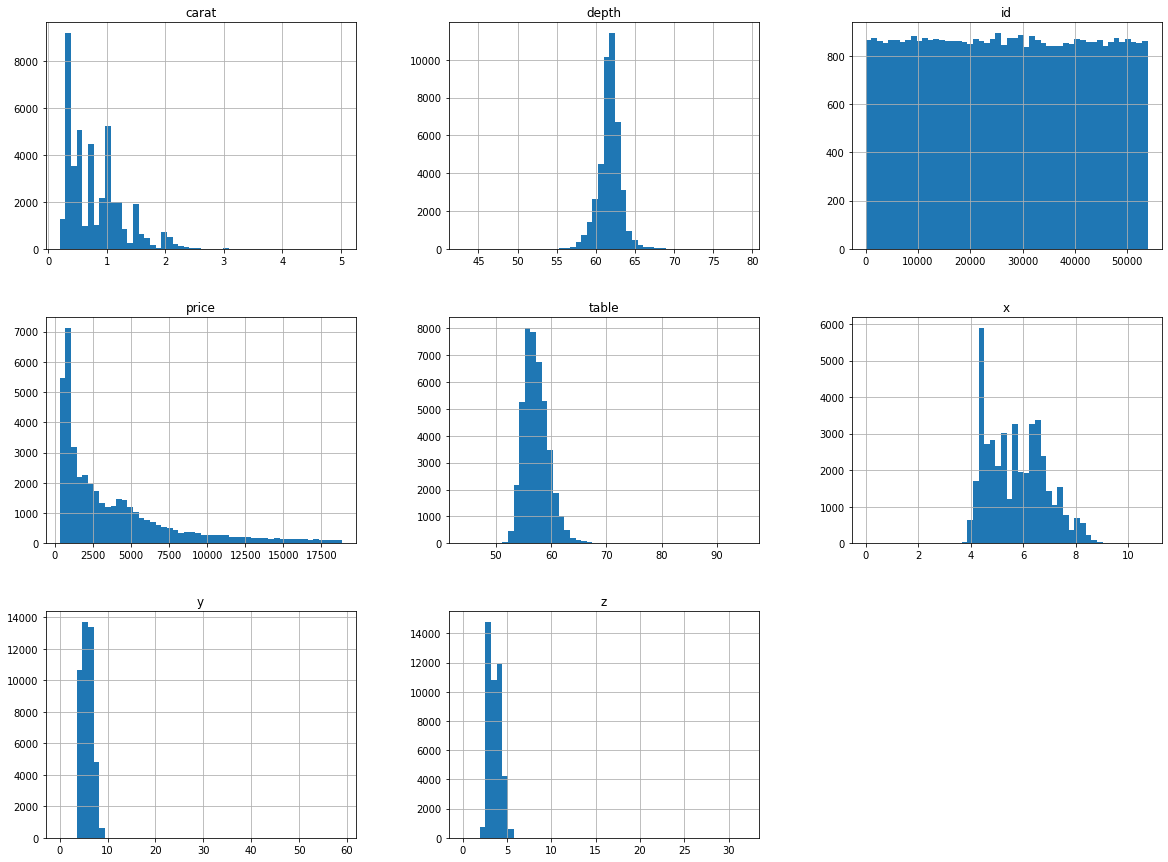

In [6]:
#  Have a rough idea on the distribution of each attributes 
#  X stands for the value and Y stands for the amount
diamonds.hist(bins = 50, figsize = (20, 15))
plt.show()

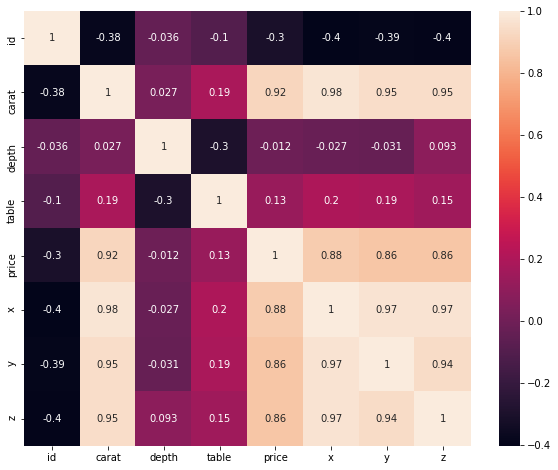

In [7]:
# Create a correlation matrix between every pair of attributes and try to find the relationship between them
corr_matrix = diamonds.corr()
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

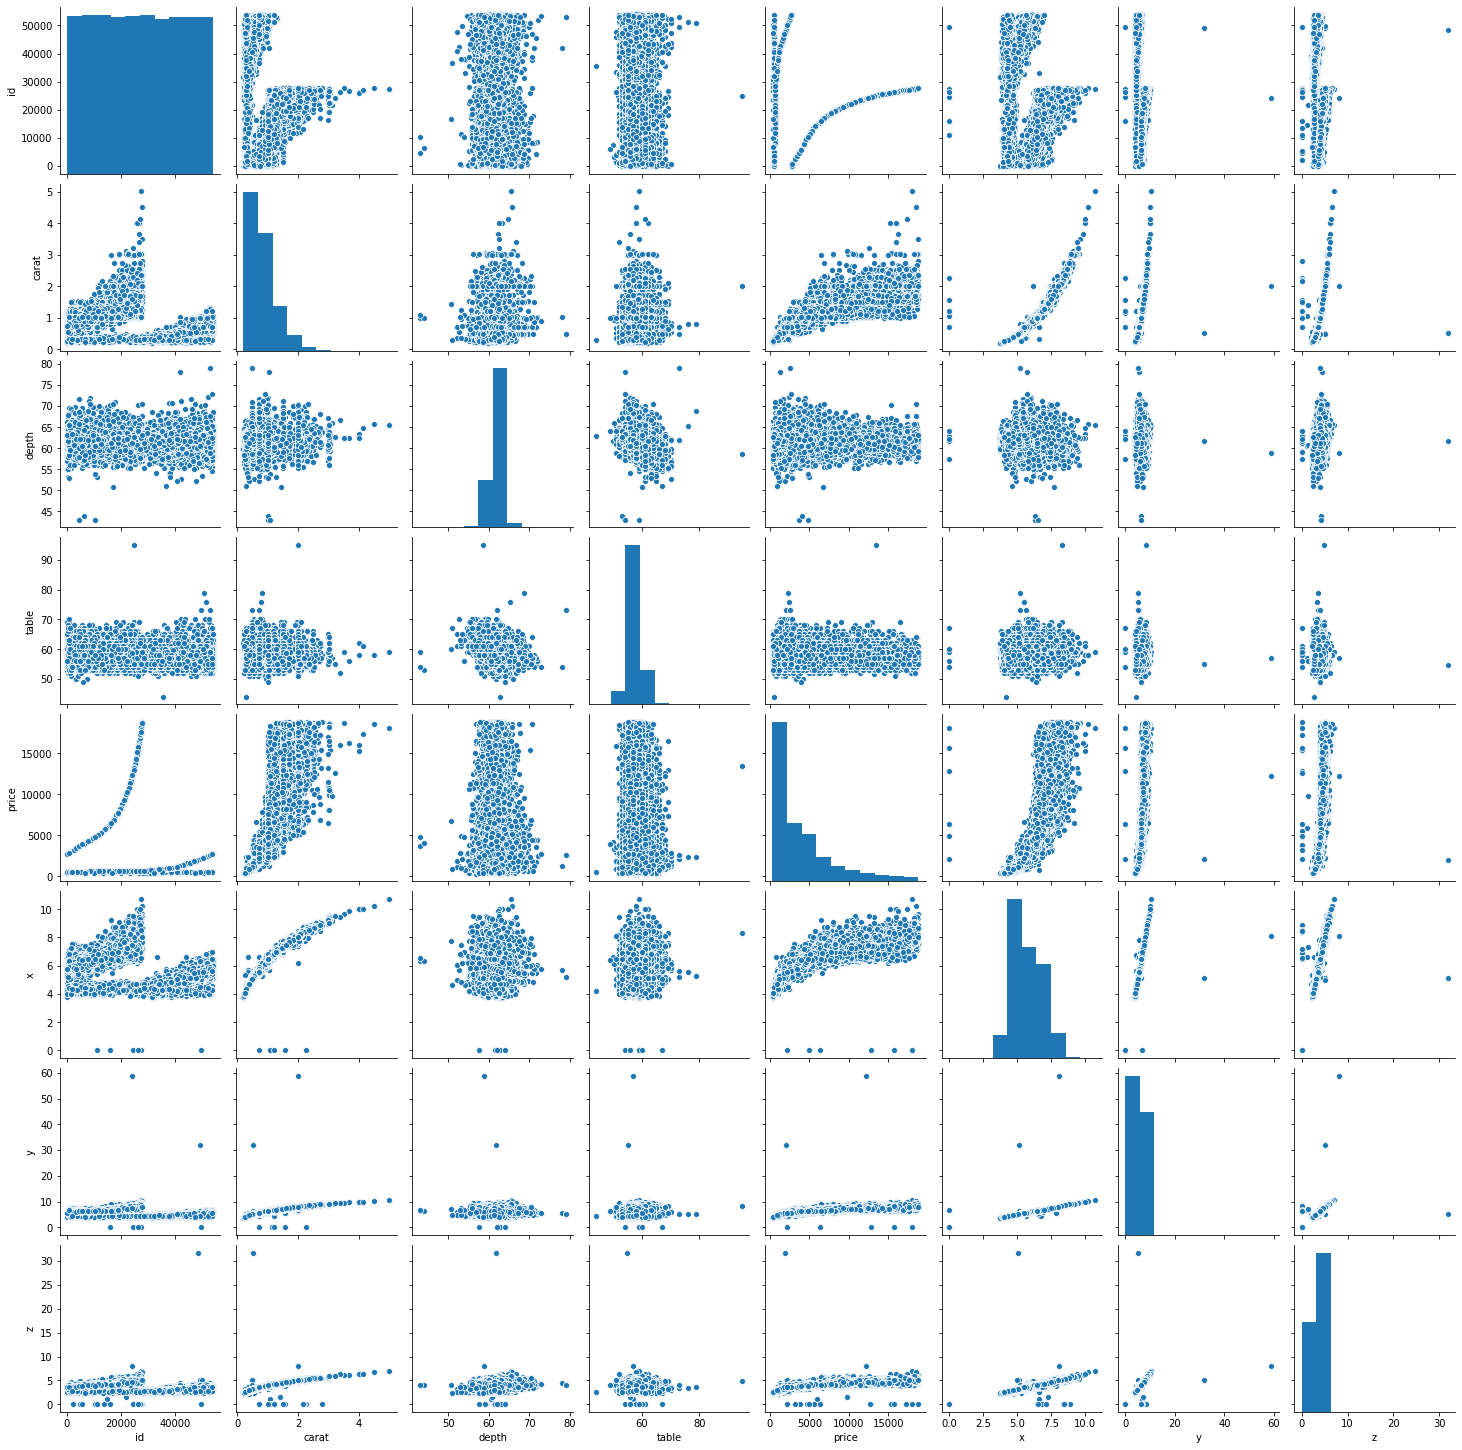

In [8]:
# See the relationship  of every pair of attributes
sns.pairplot(data = diamonds)

/Users/melvin/Projects/kaggle/eee-datathon-2020/env/lib/python3.7/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


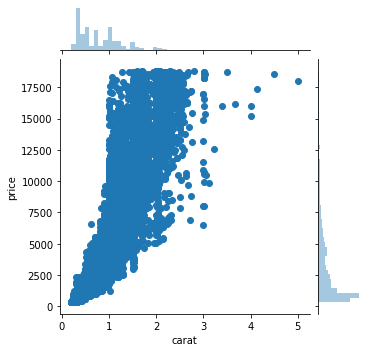

In [9]:
# Show the relationship between price and carat
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)

/Users/melvin/Projects/kaggle/eee-datathon-2020/env/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


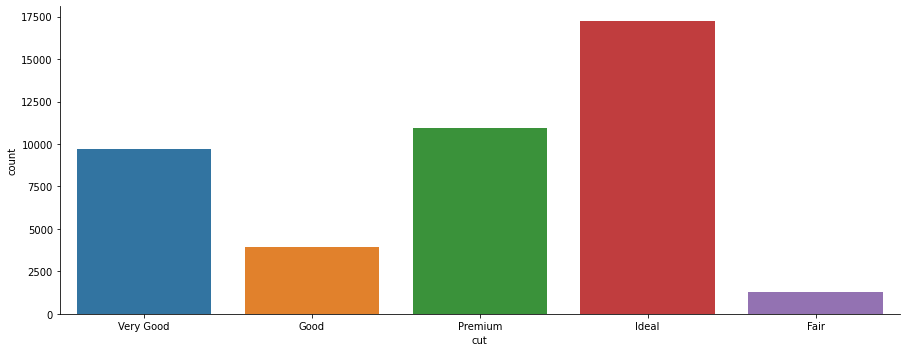

In [10]:
# Count the number of diffent cut
sns.factorplot(x='cut', data=diamonds , kind='count',aspect=2.5 )

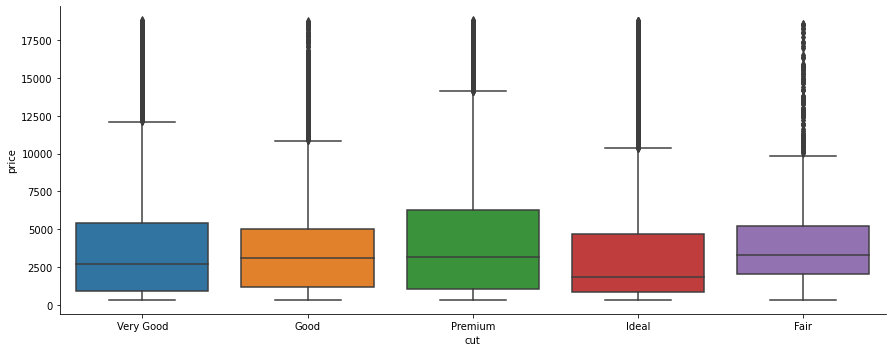

In [11]:
# Show the relationship between price and quality
sns.factorplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=2.5 )

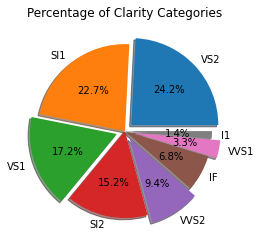

In [12]:
# Show the percentage of Clarity Categories
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True)
plt.title("Percentage of Clarity Categories")
plt.plot()
plt.show()

/Users/melvin/Projects/kaggle/eee-datathon-2020/env/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


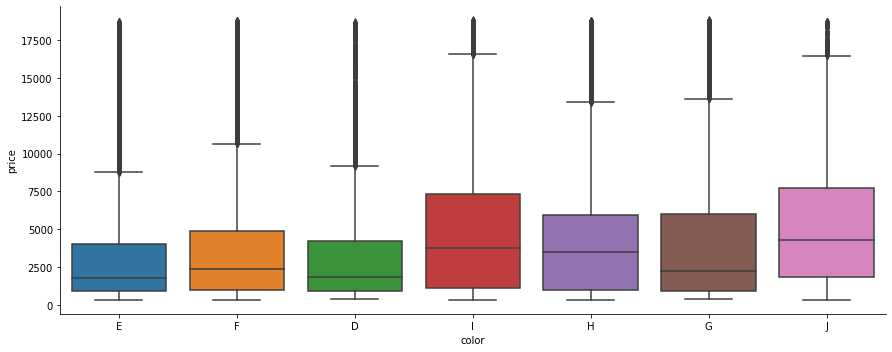

In [13]:
# Show the relationship between price and clarity
sns.factorplot(x='color', y='price', data=diamonds, kind='box' ,aspect=2.5 )

## 4. Process Train dataset

In [14]:
scaler = StandardScaler()
# Drop categorical (non-numeric) columns.
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis = 1)

### Convert categorical data to One Hot Encoding

In [15]:
hot = OneHotEncoder(sparse=False)
diamonds_cat = diamonds[["cut", "color", "clarity"]]
diamonds_cat_hot = hot.fit_transform(diamonds_cat)

# Output type of a fit_transform is ndarray so we need to convert it back to DataFrame
diamonds_cat_hot = pd.DataFrame(diamonds_cat_hot,index=diamonds_cat.index)
diamonds_cat_hot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Combine categorical and numerical data

In [16]:
# Concat both DataFrames
diamonds_ready = pd.concat([diamonds_num,diamonds_cat_hot],axis=1)
diamonds_ready.head()

,id,carat,depth,table,price,x,y,z,0,1,...,10,11,12,13,14,15,16,17,18,19
0,27454,1.70,58.6,60.0,18107.0,7.91,7.82,4.61,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38353,0.47,61.1,61.0,1021.0,4.97,5.01,3.05,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2675,0.70,57.8,60.0,3239.0,5.85,5.87,3.39,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,15280,1.50,62.9,57.0,6132.0,7.28,7.26,4.57,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,49324,0.51,62.2,56.0,2093.0,5.08,5.12,3.17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 5. Train and evaluate the model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(diamonds_ready.drop('price',axis=1),diamonds_ready['price'],test_size=0.2)

model = xgb.XGBRegressor(booster='gbtree',objective='reg:linear',n_estimators=1000)
model.fit(X_train,y_train)

# Evaluate model using train set
train_r2 = model.score(X_train,y_train) #R^2 score
pred = model.predict(X_train)
train_mse = mean_squared_error(y_train,pred)
print('train_r2:  ', train_r2)
print('train_mse: ', train_mse)

# Evaluate model using train set
test_r2 = model.score(X_test,y_test) # R^2 score
pred_test = model.predict(X_test)
test_mse = mean_squared_error(y_test,pred_test)
print('test_r2:   ', test_r2)
print('test_mse:  ', test_mse)

[14:56:19] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:47] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
train_r2:   0.9999993205434381
train_mse:  10.853571635274161
test_r2:    0.9999384353231834
test_mse:   977.0226302094103


## 6. Import and process Test dataset

In [18]:
diamonds_submission = pd.read_csv(data_dir+"test.csv",index_col = False)

In [19]:
scaler_submission = StandardScaler()
diamonds_submission_num = diamonds_submission.drop(["cut", "color", "clarity"], axis = 1)
diamonds_submission_num.head()

,id,carat,depth,table,x,y,z
0,6735,0.31,61.2,55.0,4.41,4.44,2.70
1,48105,0.50,61.6,60.0,5.13,5.10,3.15
2,49587,0.58,61.6,56.0,5.37,5.40,3.31
3,6209,1.01,59.4,59.0,6.53,6.56,3.89
4,22723,1.56,62.1,56.0,7.44,7.46,4.63


In [20]:
hot_submission = OneHotEncoder(sparse=False)
diamonds_submission_cat = diamonds_submission[["cut", "color", "clarity"]]
diamonds_submission_cat_hot = hot_submission.fit_transform(diamonds_submission_cat)

# Output type of a fit_transform is ndarray so we need to convert it back to DataFrame
diamonds_submission_cat_hot = pd.DataFrame(diamonds_submission_cat_hot,index=diamonds_submission_cat.index)
diamonds_submission_cat_hot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Concat both DataFrames
diamonds_submission_ready = pd.concat([diamonds_submission_num,diamonds_submission_cat_hot],axis=1)
diamonds_submission_ready.head()

,id,carat,depth,table,x,y,z,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,6735,0.31,61.2,55.0,4.41,4.44,2.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48105,0.50,61.6,60.0,5.13,5.10,3.15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,49587,0.58,61.6,56.0,5.37,5.40,3.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6209,1.01,59.4,59.0,6.53,6.56,3.89,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,22723,1.56,62.1,56.0,7.44,7.46,4.63,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 7. Predict the prices using the trained model

In [22]:
diamonds_submission_pred = model.predict(diamonds_submission_ready)
diamonds_submission_pred

array([ 577.2479, 1934.3752, 2148.253 , ..., 3369.6768, 2516.337 ,
        619.5695], dtype=float32)

### Save file for submission

In [23]:
price_submission = pd.read_csv(data_dir+"submission_sample.csv",index_col = False)

In [24]:
price_submission['price'] = diamonds_submission_pred
price_submission.head()

,id,price
0,6735,577.247925
1,48105,1934.375244
2,49587,2148.252930
3,6209,4001.857422
4,22723,10742.173828


In [25]:
price_submission.to_csv("submission.csv", index=False)